### EDA Analysis

I have done eda analysis on student performace dataset, where now first going to first take a prepare the data and understand its nature.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('performance.csv')

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.isnull().sum() #Insight: There is no missing values

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
data.info() #Insight: 3 numerical columns and 5 columns with strings

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [11]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## After analysis the data, i am adding a new column with average values of the three numerical data

In [22]:
data['average_score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data.to_csv('updatedperformance.csv', index=False)


## after i have created the feature, now i would like to check the correlation between the numerical data

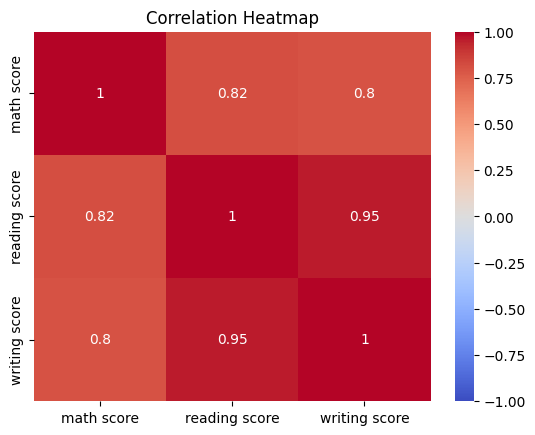

In [14]:
correlation_matrix = data[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()  #insight: the three columns are perfect linear


## I want to know the connection between parents education and average marks

In [23]:
data = pd.read_csv('updatedperformance.csv')

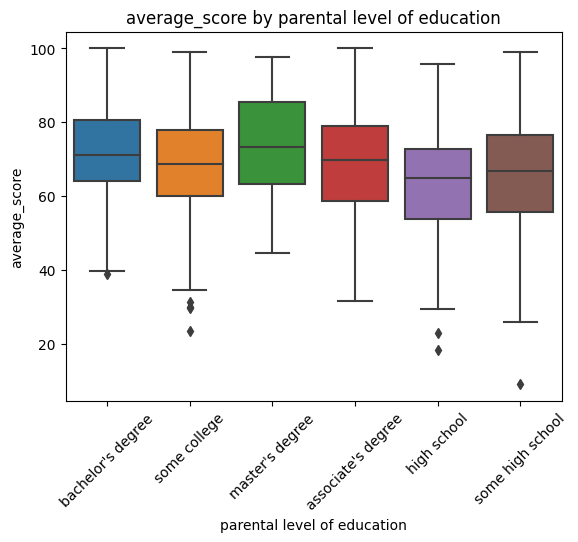

In [27]:
sns.boxplot(data=data, x='parental level of education', y='average_score')
plt.xlabel('parental level of education')
plt.ylabel('average_score')
plt.title('average_score by parental level of education')
plt.xticks(rotation=45)
plt.show()  #insight: Parents with master have a slighter edge


## I would like to know the connection between test preparation course and average feature

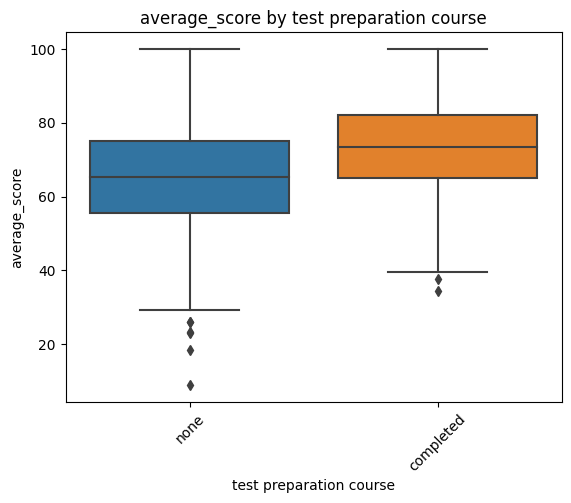

In [26]:
sns.boxplot(data=data, x='test preparation course', y='average_score')
plt.xlabel('test preparation course')
plt.ylabel('average_score')
plt.title('average_score by test preparation course')
plt.xticks(rotation=45)
plt.show()  #insight: test completed students tend to have higher scores


## I would like to know the connection between gender and average course

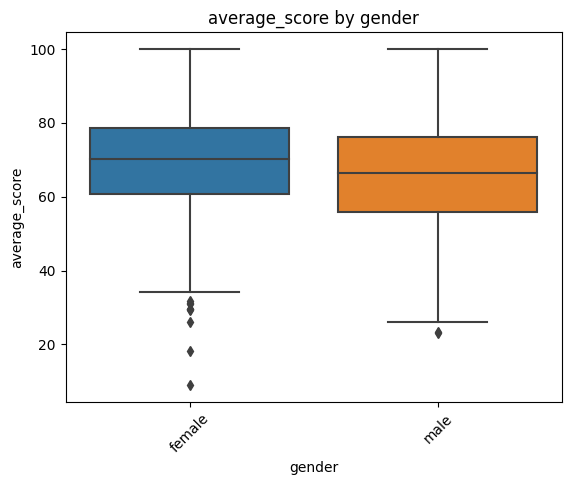

In [31]:
sns.boxplot(data=data, x='gender', y='average_score')
plt.xlabel('gender')
plt.ylabel('average_score')
plt.title('average_score by gender')
plt.xticks(rotation=45)
plt.show()   #insights: Female students have higher scores 


## Going to create bar graphs

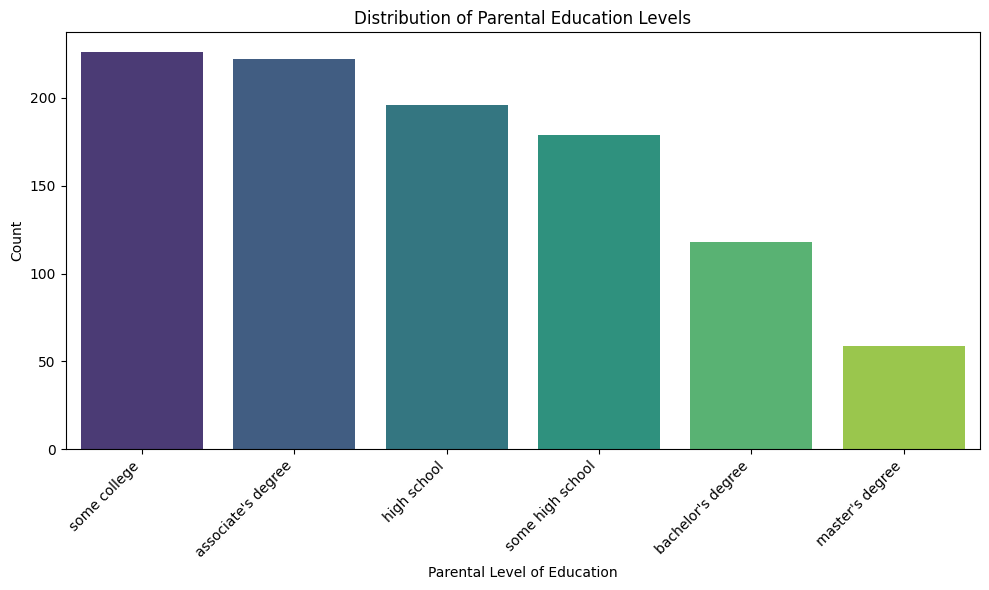

In [29]:
education_counts = data['parental level of education'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, palette="viridis")

plt.xlabel("Parental Level of Education")
plt.ylabel("Count")
plt.title("Distribution of Parental Education Levels")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()


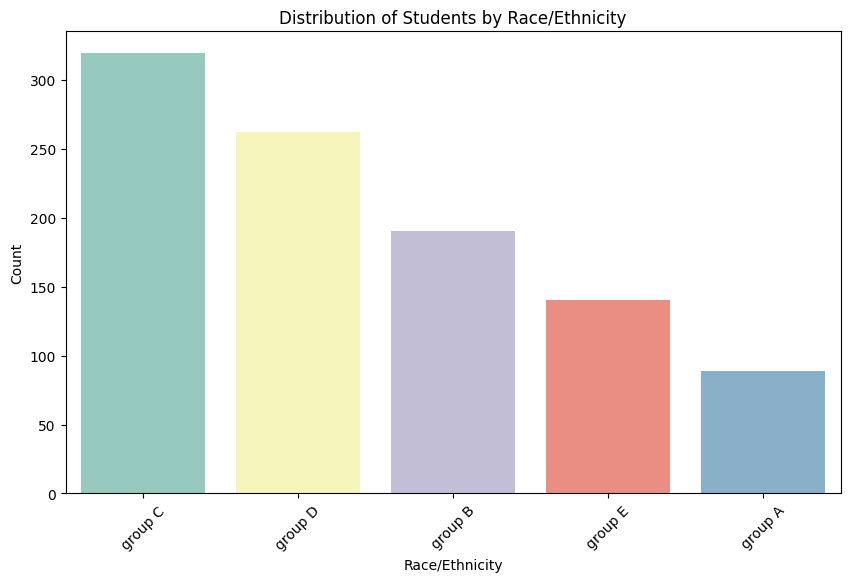

In [30]:
race_counts = data['race/ethnicity'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=race_counts.index, y=race_counts.values, palette="Set3")
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Students by Race/Ethnicity')
plt.xticks(rotation=45)
plt.show()


Insights:

--> There many be positve correlation between parental education level and student performance
--> Students who have completed a test preparation course tend to have higher scores.
--> From the below things's we got the feature importance test on the dataset

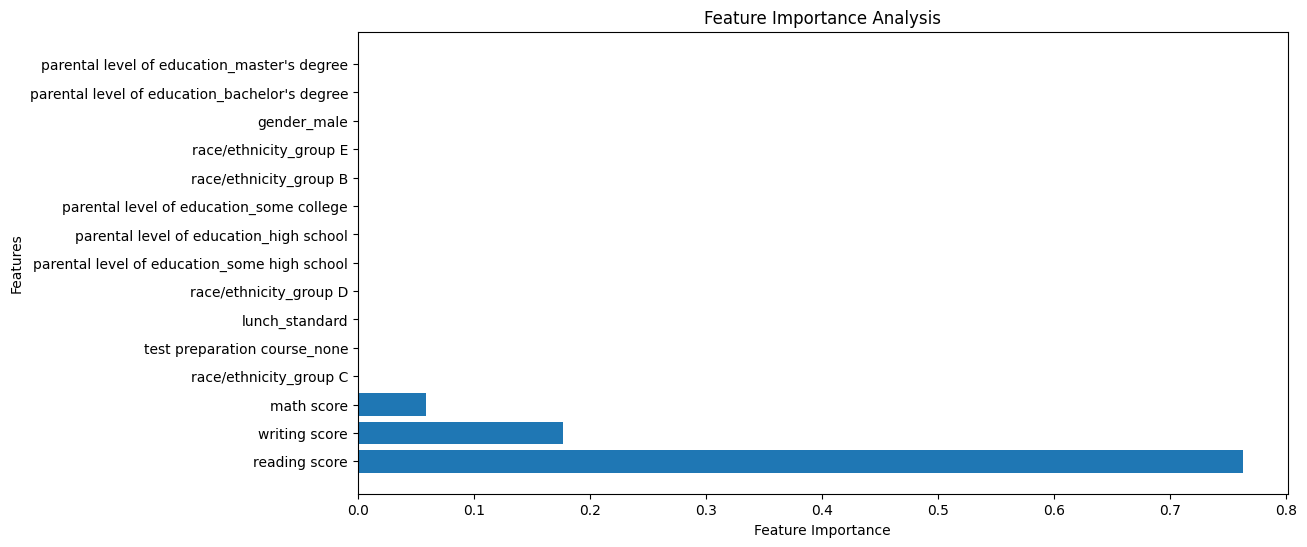

                                          Feature  Importance
1                                   reading score    0.763103
2                                   writing score    0.176767
0                                      math score    0.058583
5                          race/ethnicity_group C    0.000190
14                   test preparation course_none    0.000178
13                                 lunch_standard    0.000148
6                          race/ethnicity_group D    0.000144
12   parental level of education_some high school    0.000144
9         parental level of education_high school    0.000137
11       parental level of education_some college    0.000134
4                          race/ethnicity_group B    0.000116
7                          race/ethnicity_group E    0.000100
3                                     gender_male    0.000100
8   parental level of education_bachelor's degree    0.000097
10    parental level of education_master's degree    0.000059


In [53]:
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('updatedperformance.csv')

X = df.drop(columns=['average_score']) 
y = df['average_score'] 

X_encoded = pd.get_dummies(X, drop_first=True)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_encoded, y)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Analysis')
plt.show()

print(feature_importance_df)
